##### 참고 링크
- https://koreanfoodie.me/178?category=848327
- https://nbviewer.jupyter.org/github/SDRLurker/deep-learning/blob/master/6%EC%9E%A5.ipynb

##### 매개변수 갱신
신겨망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것이다. 이는 매개변수의 최적값을 찾는 문제이며, 이러한 문제를 푸는 것은 __최적화(optimization)이다.__ <br><br>

우리는 지금까지 매개변수의 기울기(미분)을 이용해 기울어진 방향으로 매개변수 값을 갱신하는 일을 반복해 최적화를 진행했다. 이것이 __확률적 경사 하강법(SGD)__ 이다. SGD는 단순하지만, SGD보다 똑똑한 방법도 있다. 지금부터 SGD의 단점을 알아보고, SGD와는 다른 최적화 기법을 알아보도록 하겠다.

이 책에서는 모험가가 최적의 경로를 찾기 위해 최적의 기울기를 탐색해 계속하여 '깊은 곳'에 도착하는 것을 목표로 하는 것을 예시로 하고있다.

![](img/optimization.png)

##### - 확률적 경사 하강법(SGD)

SGD의 수식을 보며 복습을 해 보자.

$$
W ← W - \eta\frac{\partial L}{\partial W}
$$
- W : 갱신할 가중치 매개변수
- $\frac{\partial L}{\partial W}$ : w에 대한 손실 함수의 기울기
- $\eta$ : 학습률
- $←$ : 우변의 값으로 좌변의 값을 갱신

In [2]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

- lr : learning rate(학습률)
- params, grads는 Dictionary 변수이며, 각각 __가중치 매개변수__와 __기울기__를 저장

##### 신경망 매개변수 진행 의사코드(pseudocode)

In [ ]:
#pseudocode 

network = TwoLayerNet(...)
optimizer = SGD() ###
for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...) # 미니배치
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads) ###
    ...

optimizer는 '최적화를 행하는 자'라는 뜻의 단어로, 위 코드에서는 SGD가 그 역할을 한다.<br> 이처럼 최적화를 담당하는 클래스를 분리해 구현하면 기능을 모듈화하기 좋다.

##### SGD의 단점
__SGD__ 는 단순하고 구현도 쉽지만, 문제에 따라서는 비효율적일 때가 있다.
$$
f(x,y) = \frac{1}{20}x^2 + y^2 ••• 식 6.2
$$ 

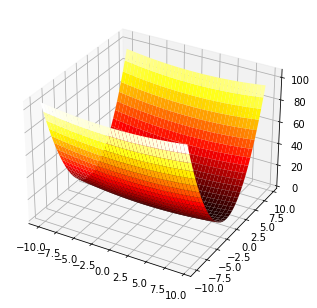

In [3]:
# 3차원 참고주소: https://www.datascienceschool.net/view-notebook/6e71dbff254542d9b0a054a7c98b34ec/
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-10, 10, 0.5)
Y = np.arange(-10, 10, 0.5)
XX, YY = np.meshgrid(X, Y)
ZZ = (1 / 20) * XX**2 + YY**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, cmap='hot');

(-10.0, 10.0)

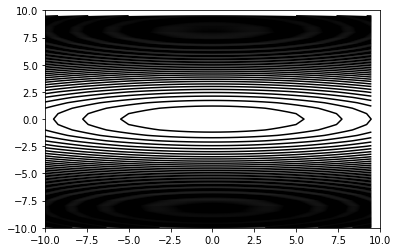

In [4]:
# 위 식 6.2를 등고선으로 표현
plt.contour(XX, YY, ZZ, 100, colors='k')
plt.ylim(-10, 10)
plt.xlim(-10, 10)

##### 식 6.2 기울기 특징
- y축 방향은 가파른데 x축 방향은 완만함
- 기울기의 대부분은 (0,0) 방향을 가리키지 않음

In [5]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

No handles with labels found to put in legend.


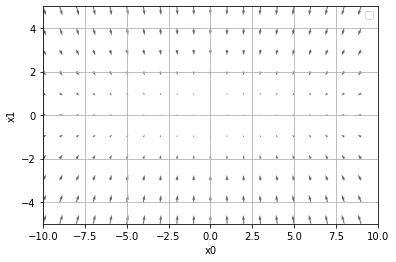

In [6]:
from mpl_toolkits.mplot3d import Axes3D

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
     
x0 = np.arange(-10, 10, 1)
x1 = np.arange(-10, 10, 1)
X, Y = np.meshgrid(x0, x1)
    
X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([(1/(20**0.5))*X, Y]) )
    
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-10, 10])
plt.ylim([-5, 5])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

__SGD 단점 :__ 비등방성(anisotropy) 함수 (방향에 따라 기울기가 달라지는 함수)에서 <u>탐색경로가 비효율적</u>

---

## 6.1.4 모멘텀
##### 모멘텀이란 ? 
&nbsp;  모멘텀(momentum)이란 단어는 __관성, 탄력, 가속도__라는 뜻입니다. <br>
__모멘텀 SGD는 경사 하강법에 관성을 더해 주는 것__입니다. 경사 하강법과 마찬가지로 매번 기울기를 구하지만, 가중치를 수정하기전 이전 수정 방향(+,-)를 참고하여 같은 방향으로 일정한 비율만 수정되게 하는 방법입니다. 수정이 양(+) 방향, 음(-) 방향 순차적으로 일어나는 지그재그 현상이 줄어들고, 이전 이동 값을 고려해여 일정 비율만큼 다음 값을 결정하므로 관성의 효과를 낼 수 있습니다.
![](img/momentum1.png)
출처: https://twinw.tistory.com/247 [흰고래의꿈]

<br><br>
__아래 식에서 $\alpha$는 Learning Rate, $m$은 momentum 계수이다.__
$$
V(t) = m * V(t-1) - \alpha\frac{\partial}{\partial w}Cost(w)
$$
$$
W(t+1) = W(t) + V(t)
$$

![](img/momentum2.png)
> - __gradient의 방향이 변경되어도 이전 방향과 크기에 영향받아 다른 방향으로 가중치가 변경될 수 있다.__
> - 모멘텀의 갱신 경로는 공이 그릇 바닥을 구르듯이 움직임
> - SGD와 비교하면 지그재그 정도가 덜함

##### 모멘텀의 구현

In [12]:
class Momentum:
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

- $v$ : 물체의 속도
- $v$는 초기화 때는 아무것도 담지 않고, update가 처음 호출될 때 같은 구조의 데이터를 Dictionary변수로 저장

---
##### 6.1.5 AdaGrad (Adaptive Gradient)

__학습률 감소(Learning rate decay)__ : 학습을 진행하면서 학습률을 점차 줄여가는 방법<br>
개별 매개변수에 적응적으로(adaptive) 학습률을 조정하면서 학습을 진행<br>
__식 6.5__
$$
h := h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W}
$$
__식 6.6__
$$
W := W - \eta\frac{1}{\sqrt{h}}\frac{\partial L}{\partial W}
$$
- $W$ : 갱신할 매개변수
- $\frac{\partial L}{\partial W}$ : 손실함수의 기울기
- $\eta$ : Learning Rate, 미리 정해서 사용 
- $h$ : 기존 기울기 값에 제곱하여 계속 더해줌

매개변수를 갱신할 때 $\frac{1}{\sqrt(h)}$을 곱해 학습률을 조정 <br>
AdaGrad는 학습을 진행할수록 갱신강도가 약해짐

---
##### ※ RMSProp (Root Mean Square Propagation)
__지수이동평균(Exponential Moving Average, EMA)__를 이용하여 먼 과거의 기울기를 서서히 잊고, 새로운 기울기 정보를 크게 반영

&nbsp;이전 AdaGrad 설명에서 언급했듯이 AdaGrad 는 최소값에 도달하기 전에 학습률을 0에 수렴하게 만들 수도 있다. <br>AdaGrad 가 간단한 convex function 에선 잘 동작하지만, 복잡한 다차원 곡면 함수를 (상대적으로)잘 탐색하도록 설계되지 않기도 했고, 기울기의 단순한 누적만으로는 충분하지 않은 셈이다.
![](img/rmsprop.png)
이전 AdaGrad 의 h 에 새로운 hyper parameter ρ 를 추가하였다. <br>
__이제 h 가 무한히 커지지 않으면서 ρ 가 작을 수록 가장 최신의 기울기를 더 크게 반영하게 된다.__

---

__AdaGrad의 구현__

In [16]:
class AdaGrad:
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

---
##### 6.1.6 Adam (Adaptive Moment Estimation)
- 모멘텀 : 공이 그릇을 구르는 듯한 물리 법칙에 따르는 움직임
- AdaGrad : 매개변수의 원소마다 적응적으로 갱신 정도를 조정
- Adam : __모멘텀과 Adagrad 기법을 융합__ <br>

__매개변수 공간을 효율적으로 탐색 => 하이퍼 파라미터의 '편향 보정'이 진행됨__

##### Adam의 구현
- 나중에 논문을 참고해서, 수식을 구체적으로 공부해봐야될듯,,

In [17]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/common/optimizer.py 참고
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

##### 6.1.7 어느 갱신 방법을 이요할 것인가?
- 4가지 경사하강법 기법의 결과를 비교
- 1. SGD
- 2. Momentum
- 3. AdaGrad
- 4. Adam

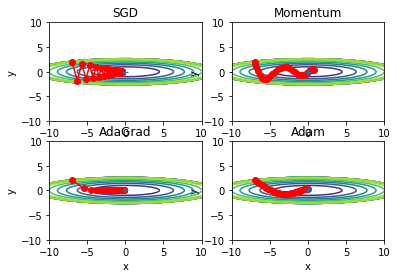

In [18]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch06/optimizer_compare_naive.py 참고
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

def f(x, y):
    return x**2 / 20.0 + y**2

def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

> - 문제가 무엇이냐에 따라 사용할 기법이 달라짐
> - Hyper Parameter를 어떻게 설정하느냐에 따라서 결과도 바뀜
> - __모든 문제에서 항상 뛰어난 기법은 아직 없음__
> - 추후에 이 책에서는 SGD, Adam을 많이 사용할 예정이라고 함

===========iteration:0===========
SGD:2.3784388290654173
Momentum:2.382863409220173
AdaGrad:2.1015353132289554
Adam:2.19736573362586
===========iteration:1000===========
SGD:0.30515821417867167
Momentum:0.08620485661556625
AdaGrad:0.04355996861215536
Adam:0.061381916504649636
===========iteration:2000===========
SGD:0.16166778351726524
Momentum:0.04376700231899206
AdaGrad:0.02679719612427227
Adam:0.05837341025357438
===========iteration:3000===========
SGD:0.1803522934509492
Momentum:0.036434236340210285
AdaGrad:0.016540030192828663
Adam:0.022967014009577826
===========iteration:4000===========
SGD:0.07260699401955625
Momentum:0.003809404797583118
AdaGrad:0.007181497681627973
Adam:0.0035917165939748355


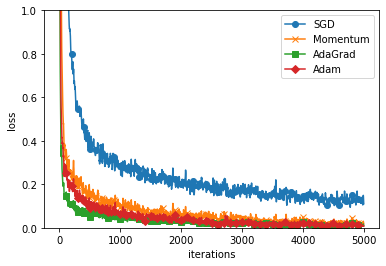

In [21]:
# coding: utf-8
#import os
#import sys
#sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
#from common.optimizer import *

# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 5000

# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    

# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 1000 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

> - 각 층이 100개의 뉴런으로 구성된 5층 신경망에서 ReLU를 활성화 함수로 측정
> - Hyper parameter인 학습률과 신경망의 구조(층, 깊이 등)에 따라 결과가 달라짐
> - 일반적으로 SGD보다 다른 세 기법이 빠르고, 때로는 최종 정확도 또한 높다.

---

# 6.2 가중치의 초기값
가중치의 초기값을 무엇으로 설정하느냐가 신경망 학습의 성패를 가름

##### 6.2.1 초기값은 0으로 하면?
가중치 감소(weight decay)
- 가중치 매개변수 값이 작아지도록 학습하는 방법
- 가중치 값을 작게하여 Overfitting이 일어나지 않음

__초기값을 작게 하기 위해 $0.01 *$ np.random.randn(10, 100) 처럼 정규분포로 생성된 값에 $0.01$을 곱합__ <br><br>

__※ 초기값을 모두 0으로 해서는 안되는 이유는 ?__ <br>
=> 오차 역전파에서 모든 가중치의 값이 똑같이 갱신되기 때문이다. <br><br>

- 순전파 : 입력파의 가중치가 0이기 때문에 두 번째 층의 뉴런에 모든 값이 전달
- 역전파 : 가중치가 모두 똑같이 갱신

##### 6.2.2 은닉층의 활성화값 분포
- 가중치의 초기값에 따라 은닉층 활성화 값들이 어떻게 변하는지 실험
- 각 층의 활성화값 분포를 히스토그램으로 그림

In [22]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch06/weight_init_activation_histogram.py 참고
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

def get_activation(hidden_layer_size, x, w, a_func=sigmoid):
    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i-1]

        a = np.dot(x, w)

        # 활성화 함수도 바꿔가며 실험해보자！
        z = a_func(a)
        # z = ReLU(a)
        # z = tanh(a)

        activations[i] = z
    return activations
    
# 초깃값을 다양하게 바꿔가며 실험해보자！
w = np.random.randn(node_num, node_num) * 1
# w = np.random.randn(node_num, node_num) * 0.01
# w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
# w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

z = sigmoid
# z = ReLU
# z = tanh

activations = get_activation(hidden_layer_size, x, w, z)

##### 표준편차가 1인 정규분포의 활성화값들의 분포

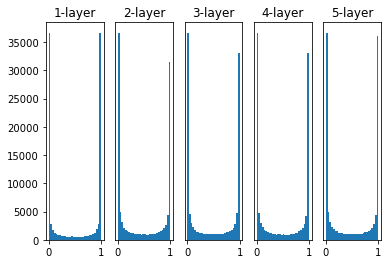

In [25]:
# 히스토그램 그리기
def get_histogram(activations):
    for i, a in activations.items():
        plt.subplot(1, len(activations), i+1)
        plt.title(str(i+1) + "-layer")
        if i != 0: plt.yticks([], [])

        plt.hist(a.flatten(), 30, range=(0,1))
    plt.show()

get_histogram(activations)

&nbsp;각 층의 활성화값들이 0과 1에 치우쳐 분포되어 있다. <br>여기에서 사용한 Sigmoid함수는 그 출력이 0에 가까워지자 (또는 1에 가까워지자) 그 미분은 0에 다가간다.<br>
그래서 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다 사라진다.<br><br>
&nbsp;이것이 __기울기 소실__이라 알려진 문제이며, 층을 깊게 하는 딥러닝에서는 기울기 소실은 더 심각한 문제가 될 수 있다.

▶ <u>__1. 가중치의 표준편차를 0.01로 바꿔 같은 실험을 반복__</u>

- 앞의 코드에서 가중치 초기값 설정 부분만 아래와 같이 변경 수 시각화

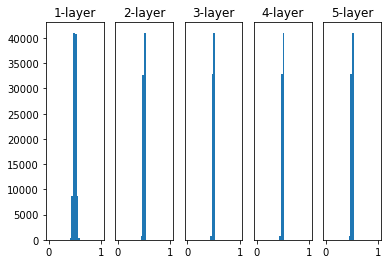

In [29]:
w = np.random.randn(node_num, node_num) * 0.01
activations = get_activation(hidden_layer_size, x, w, z)

get_histogram(activations)

> - 이번에는 0.5 부근에 집중된 것을 볼 수 있다. 
> - 앞의 예시 처럼 0과 1로 치우치진 않아서 기울기 소실 문제는 일어나지 않았지만, 활성화값들이 치우쳐져 있어 뉴런을 여러개 둔 의미가 사라진다.
> - => 그래서, 활성화값들이 치우치면 __표현력을 제한__한다는 관점에서 문제가 된다.

표현력을 제한한다는 점은, 예를 들어 뉴런 100개가 거의 같은 값을 출력한다면 뉴런 1개짜리와 별반 다를게 없음을 의미함

▶ <u>__2. Xavier 초기값__</u>
- 사비에르 글로로트와 요슈아 벤지오의 논문에서 권장하는 가중치 초깃값
- 위 논문은 각 층의 활성화값들을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾는것이 목표
- 앞 계층의 노드가 n개라면 표준편차가 $\frac{1}{\sqrt{n}}$ 인 정규분포를 사용하면 된다는 결론을 이끌었다.

![](img/xavier.png)

__Xavier 초깃값을 사용하면 앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다.__ <br><br>

▶ <u>__3. He 초기값__(He Initialization) 이란?</u> <br>
- Xabier를 변형한 초기화 방법으로 , __ReLU 함수에 가장 적합__
- He 초기값은 앞 계층의 노드가 n일때, 표준편차가 $\sqrt{\frac{2}{n}}$인 정규분포를 사용한다.

##### Xavier 초깃값을 사용하여 실험

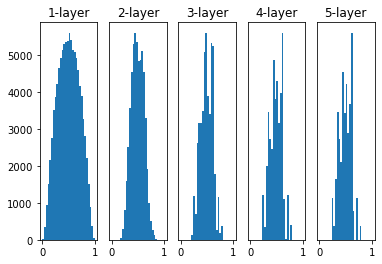

In [33]:
node_num = 100 # 앞 층의 노드 수

#노드별 가중치
w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
activations = get_activation(hidden_layer_size, x, w, z)

get_histogram(activations)

Xavier 초기값을 사용한 결과를 보면, 형태가 일그러지지만, 값들이 적당히 퍼져 있으며, 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이루어질 것을 기대할 수 있다.

##### 6.2.3 ReLU 를 사용할 때의 가중치 초기값
__Sigmoid, tanh__는 좌우 대칭이라, __Xavier 초기값__이 적당

- 1. 표준편차가 0.01인 정규분포를 가중치 초기값으로 사용한 경우
- 2. Xavier 초기값을 사용한 경우
- 3. He 초기값을 사용한 경우

__위 세가지의 Layer별 가중치 비교__

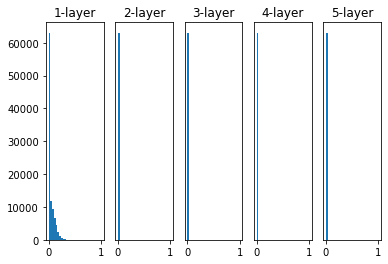

In [36]:
# 1. 표준편차가 0.01인 정규분포를 가중치 초기값으로 사용한 경우
w = np.random.randn(node_num, node_num) * 0.01
z = ReLU
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

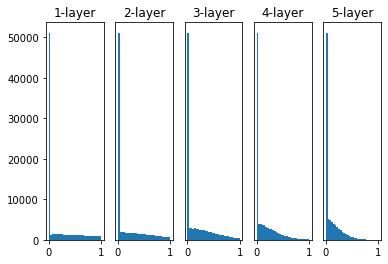

In [37]:
# 2. Xavier 초기값을 사용한 경우
w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

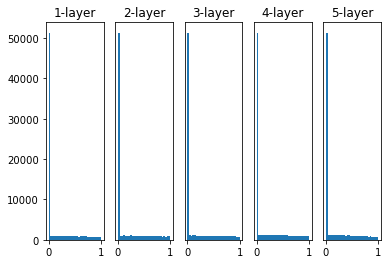

In [38]:
# 3. He 초기값을 사용한 경우
w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

__▶ 1. std = 0.01일 때__
- 각 층의 활성화 값들이 아주 작은 값들로, 역전파의 가중치 기울기 역시 작아짐
- 실제로 학습이 거의 이뤄지지 않음

__▶ 2. Xavier 초기값일 때__
- 층이 깊어지면 활성화값들이 치우짐
- 학습할 때 __기울기 소실__문제 발생

__▶ 3. He 초기값일 때__
- 모든 층에서 균일하게 분포


__▶실험 결과__
- 활성화함수로 ReLu를 사용할 때 : He 초기값이 효율적
- 활성화함수로 Sigmoid, tanh 등 S자 모양 곡선일 때는 Xavier 초기값이 효율적

##### 6.2.4 MNIST 데이터셋으로 본 가중치 초기 값
실제 데이터로 가중치의 초기값을 주는 방법이 신경망 학습에 얼마나 영향을 주는지 그래프



__▶ 1. std = 0.01일 때__

__▶ 2. Xavier 초기값일 때__ (sigmoid)

__▶ 3. He 초기값일 때__ (relu)


===========iteration:0===========
std=0.01:2.30251593222415
Xavier:2.295816417434479
He:2.428987717717031
===========iteration:500===========
std=0.01:2.301545025057313
Xavier:0.9559242121651738
He:0.3652805671546656
===========iteration:1000===========
std=0.01:2.298201701985778
Xavier:0.42333999380098497
He:0.32950651124477476
===========iteration:1500===========
std=0.01:2.3055177337274246
Xavier:0.357543353936073
He:0.19483040487138595
===========iteration:2000===========
std=0.01:2.3036373405270183
Xavier:0.26738121591748837
He:0.1629328444117784
===========iteration:2500===========
std=0.01:2.2967315135180106
Xavier:0.2564567913378445
He:0.18459438928775515


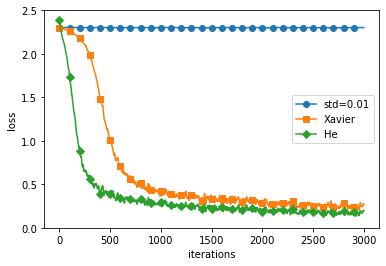

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
#from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 3000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 500 == 0:
        print("\n===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

__위 그래프를 보아, 가중치 초기값의 설정 또한, 모델에 중요한 영향을 끼친다.__